In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


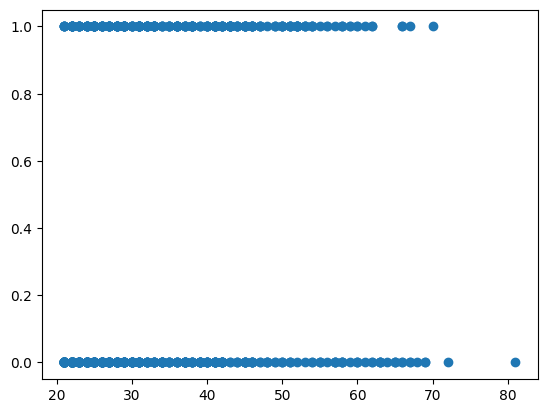

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:,7:8],df.iloc[:,-1])

<Axes: >

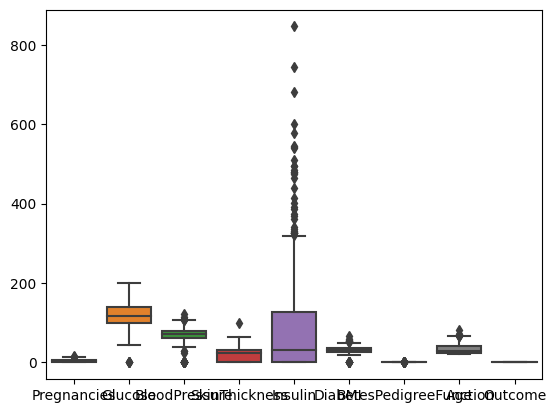

In [4]:
import seaborn as sns
sns.boxplot (df)

In [5]:
# Finding the outliers
df[(df['Insulin'] > 600) | (df['Insulin'] < 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0


In [6]:
new_df = df[(df['Insulin'] <= 600) & (df['Insulin'] >= 0)]
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x, y)

In [9]:
from sklearn.preprocessing import StandardScaler
st =StandardScaler()
X_train_resampled=st.fit_transform(X_train_resampled)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train_resampled,y_train_resampled,test_size=0.1,random_state=3)

In [11]:
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dropout ,Dense
from keras.regularizers import l1,l2

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [31]:
model=Sequential()
model.add(Dense(64, input_dim=8, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1, activation='relu'))

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

history=model.fit(x_train,y_train,epochs=50,batch_size=5, validation_data=(x_test,y_test),callbacks=callback)

Epoch 1/50
180/180 [==============================] - 4s 3ms/step - loss: 2.1877 - accuracy: 0.6600 - val_loss: 1.4089 - val_accuracy: 0.7100
Epoch 2/50
180/180 [==============================] - 0s 2ms/step - loss: 1.5434 - accuracy: 0.6900 - val_loss: 1.6169 - val_accuracy: 0.7200
Epoch 3/50
180/180 [==============================] - 0s 3ms/step - loss: 1.4225 - accuracy: 0.7256 - val_loss: 1.1070 - val_accuracy: 0.6800
Epoch 4/50
180/180 [==============================] - 0s 3ms/step - loss: 1.1099 - accuracy: 0.7200 - val_loss: 1.1962 - val_accuracy: 0.6800
Epoch 5/50
180/180 [==============================] - 0s 3ms/step - loss: 1.0002 - accuracy: 0.7167 - val_loss: 1.4537 - val_accuracy: 0.7300
Epoch 6/50
180/180 [==============================] - 0s 3ms/step - loss: 0.9721 - accuracy: 0.7311 - val_loss: 1.1986 - val_accuracy: 0.6700
Epoch 7/50
180/180 [==============================] - 1s 3ms/step - loss: 0.9996 - accuracy: 0.7467 - val_loss: 1.2695 - val_accuracy: 0.7500
Epoch 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1

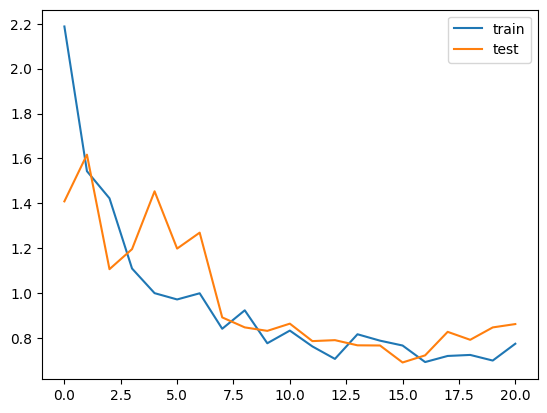

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

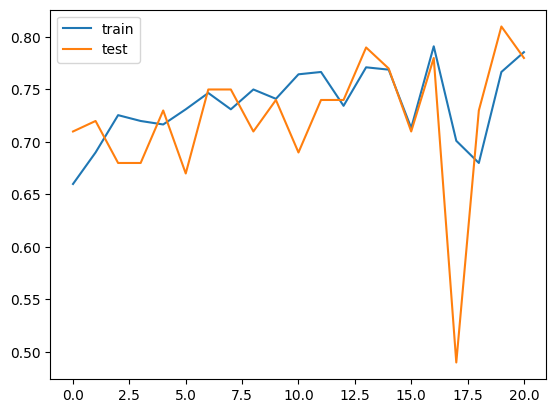

In [33]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

                                                       Keras Tuner


............................................................................................................................................................................................................................................................................

In [20]:

import keras_tuner  
from tensorflow import keras

Using TensorFlow backend


In [ ]:
def build_model(hp):
  model = keras.Sequential()
  units = hp.Int('units', min_value=8, max_value=20000, step=8)
  model.add(Dense(units, input_dim=8, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
  model.add(Dense(units, activation='relu'))
  model.add(Dense(units, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
  model.add(Dense(units, activation='relu'))
  model.add(Dense(units, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
  model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
  return model

In [16]:
def build_model(hp):
  model = keras.Sequential()
  optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd', 'adadelta', 'adagrad', 'nadam'])

  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
  model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])
  return model

In [40]:
def build_model(hp):
  model = keras.Sequential()
  num_layers = hp.Int('num_layers', min_value=1, max_value=10)
  model.add(Dense(8, activation='relu', input_dim=8))
    
    # Add the specified number of hidden layers
  for _ in range(num_layers):
    model.add(Dense(64, input_dim=8, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), activity_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
  return model

In [41]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [42]:
tuner.search(x_test, y_test, epochs=10, validation_data=(x_test, y_test))


Trial 5 Complete [00h 00m 07s]
val_loss: 2.832500696182251

Best val_loss So Far: 1.3979825973510742
Total elapsed time: 00h 00m 48s


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0].values
best_hp

{'units': 8360}

In [23]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0].values
best_hp

{'optimizer': 'rmsprop'}

In [43]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0].values
best_hp

{'num_layers': 1}